In [41]:
#Forecast the sales for 1 year for the furniture products catecory on the basis of the historical data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importing data
df=pd.read_excel(r"Sample - Superstore.xls", header=0)

#Printing head
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 21)

In [4]:
df["Category"].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

In [5]:
furniture = df[df["Category"] == "Furniture"]
furniture.shape

(2121, 21)

In [6]:
furniture.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [7]:
#furniture["Order Date"]=pd.to_datetime(furniture["Order Date"])

In [8]:
furniture["Order Date"].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [9]:
furniture=furniture[["Order Date", "Sales"]]
furniture.shape

(2121, 2)

In [10]:
furniture.head(10)

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840
23,2017-07-16,71.3720
24,2015-09-25,1044.6300
27,2015-09-17,3083.4300
29,2015-09-17,124.2000
36,2016-12-08,190.9200


In [11]:
furniture=furniture.sort_values("Order Date",ascending=True)
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [12]:
furniture.head(10)

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940
4938,2014-01-13,333.999
6474,2014-01-14,61.960
970,2014-01-16,127.104
5465,2014-01-19,181.470
6327,2014-01-20,272.940


In [13]:
furniture["Order Date"].value_counts()

Order Date
2016-09-05    10
2016-12-25     9
2016-12-01     9
2017-11-19     9
2017-10-30     9
              ..
2015-11-26     1
2015-11-24     1
2015-11-22     1
2015-11-19     1
2017-12-30     1
Name: count, Length: 889, dtype: int64

In [14]:
furniture = furniture.groupby('Order Date')["Sales"].sum().reset_index()
furniture.shape

(889, 2)

In [15]:
furniture.head(10)

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939
5,2014-01-14,61.960
6,2014-01-16,127.104
7,2014-01-19,181.470
8,2014-01-20,1413.510
9,2014-01-21,25.248


In [16]:
furniture=furniture.set_index('Order Date')

In [17]:
furniture.head(10)

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939
2014-01-14,61.960
2014-01-16,127.104
2014-01-19,181.470
2014-01-20,1413.510


In [18]:
y = furniture["Sales"].resample("M").mean()

In [19]:
print(y.shape)
y

(48,)


Order Date
2014-01-31     480.194231
2014-02-28     367.931600
2014-03-31     857.291529
2014-04-30     567.488357
2014-05-31     432.049188
2014-06-30     695.059242
2014-07-31     601.169500
2014-08-31     457.521656
2014-09-30     992.353367
2014-10-31     769.015437
2014-11-30     980.221486
2014-12-31    1532.298325
2015-01-31     978.328467
2015-02-28     522.395667
2015-03-31     781.236437
2015-04-30     805.822962
2015-05-31     624.996700
2015-06-30     428.565500
2015-07-31     719.706316
2015-08-31     602.412012
2015-09-30    1382.790684
2015-10-31     632.980184
2015-11-30    1286.701354
2015-12-31    1049.355418
2016-01-31     508.182867
2016-02-29     356.868273
2016-03-31     609.575810
2016-04-30     695.373158
2016-05-31     687.265227
2016-06-30     816.910750
2016-07-31     768.736412
2016-08-31     734.307782
2016-09-30    1135.953371
2016-10-31     624.872474
2016-11-30    1271.345152
2016-12-31    1410.719808
2017-01-31     397.602133
2017-02-28     528.179800
2

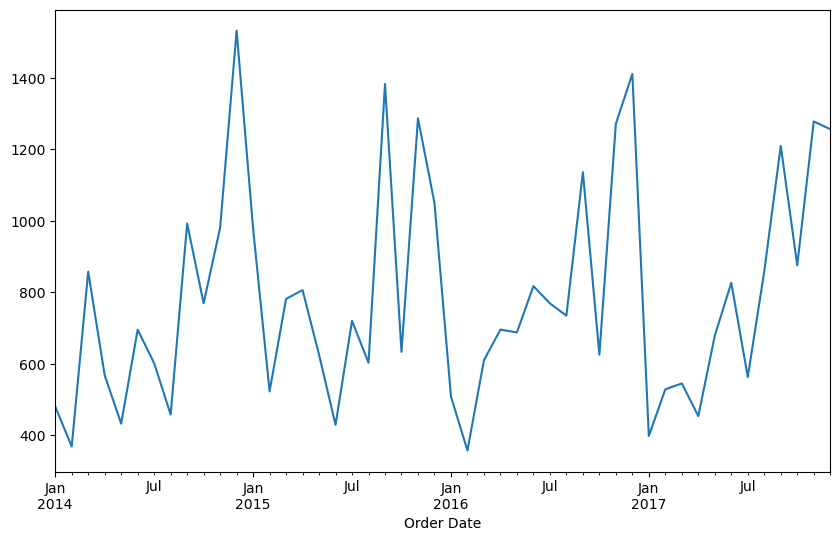

In [20]:
y.plot(figsize=(10,6))
plt.show()

In [21]:
train=y.loc[:"2016-12-31"]
#train=y.iloc[0:36]
print(train.shape)
train

(36,)


Order Date
2014-01-31     480.194231
2014-02-28     367.931600
2014-03-31     857.291529
2014-04-30     567.488357
2014-05-31     432.049188
2014-06-30     695.059242
2014-07-31     601.169500
2014-08-31     457.521656
2014-09-30     992.353367
2014-10-31     769.015437
2014-11-30     980.221486
2014-12-31    1532.298325
2015-01-31     978.328467
2015-02-28     522.395667
2015-03-31     781.236437
2015-04-30     805.822962
2015-05-31     624.996700
2015-06-30     428.565500
2015-07-31     719.706316
2015-08-31     602.412012
2015-09-30    1382.790684
2015-10-31     632.980184
2015-11-30    1286.701354
2015-12-31    1049.355418
2016-01-31     508.182867
2016-02-29     356.868273
2016-03-31     609.575810
2016-04-30     695.373158
2016-05-31     687.265227
2016-06-30     816.910750
2016-07-31     768.736412
2016-08-31     734.307782
2016-09-30    1135.953371
2016-10-31     624.872474
2016-11-30    1271.345152
2016-12-31    1410.719808
Freq: M, Name: Sales, dtype: float64

In [22]:
test=y.loc["2017-01-31":]
print(test.shape)
test

(12,)


Order Date
2017-01-31     397.602133
2017-02-28     528.179800
2017-03-31     544.672240
2017-04-30     453.297905
2017-05-31     678.302328
2017-06-30     826.460291
2017-07-31     562.524857
2017-08-31     857.881889
2017-09-30    1209.508583
2017-10-31     875.362728
2017-11-30    1277.817759
2017-12-31    1256.298672
Freq: M, Name: Sales, dtype: float64

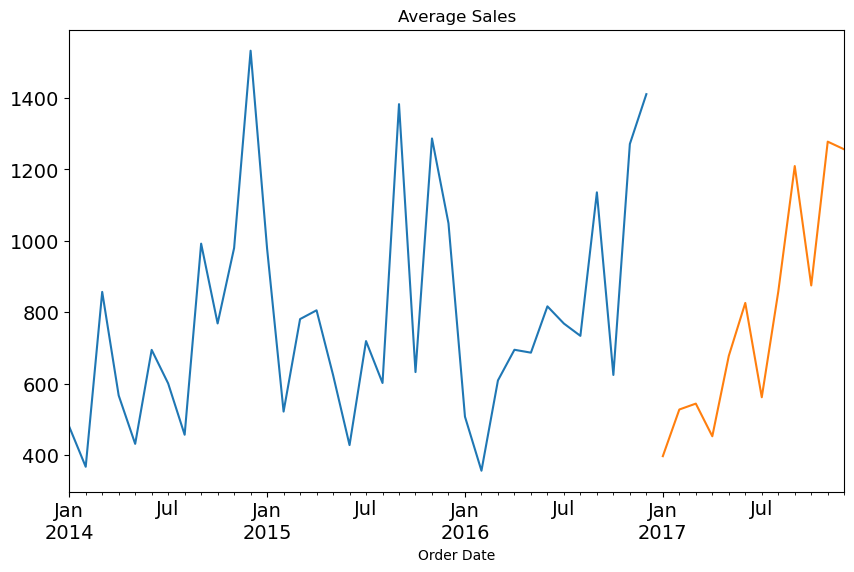

In [23]:
#Ploting data
train.plot(figsize=(10,6),title= "Average Sales", fontsize=14)
test.plot(figsize=(10,6),title= "Average Sales", fontsize=14)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

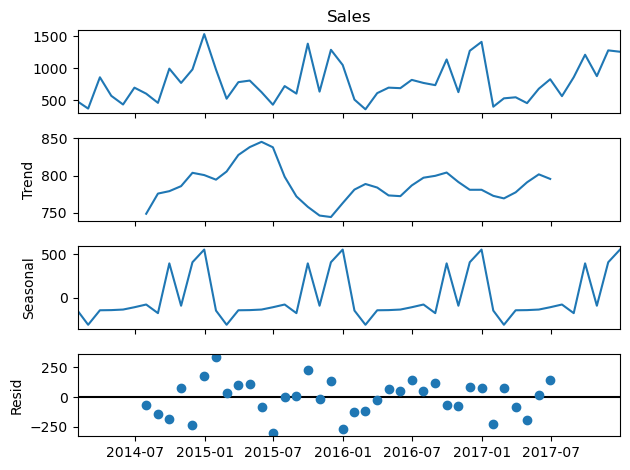

In [24]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y)
decomposition.plot()
plt.show

C:\Users\anass\anaconda3\Lib\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


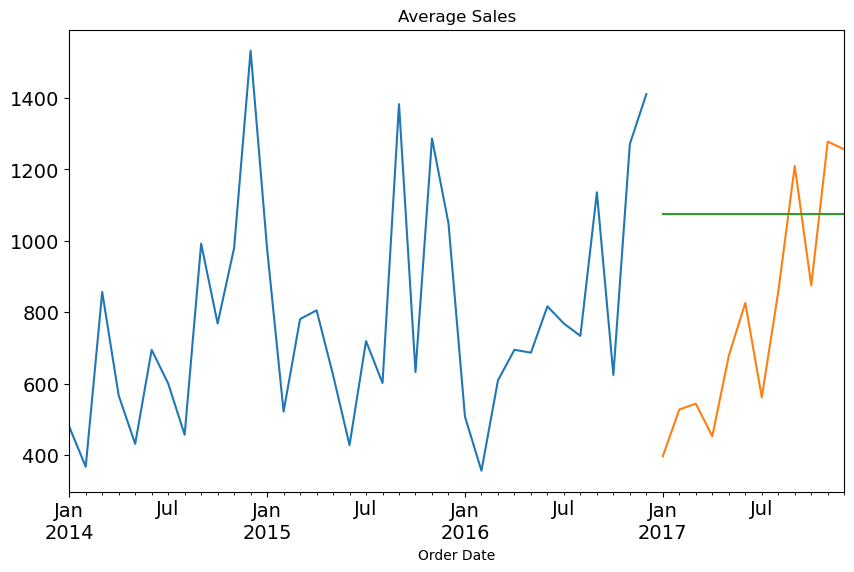

In [47]:
from statsmodels.tsa.api import SimpleExpSmoothing
Exp_Smooth = test.copy()
#smoothing level=alpha
#alpha value should be in the range of 0 to 1.
#values close to 1 indicate that older values are very less imp compared to the recent values
#values close to 0 indicate that older values are also imp
fit1 = SimpleExpSmoothing(train).fit(smoothing_level=0.3)
Exp_Smooth['SES'] = fit1.forecast(steps=len(test))
 
train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Exp_Smooth['SES'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()


In [48]:
Exp_Smooth.SES

2017-01-31    1075.393646
2017-02-28    1075.393646
2017-03-31    1075.393646
2017-04-30    1075.393646
2017-05-31    1075.393646
2017-06-30    1075.393646
2017-07-31    1075.393646
2017-08-31    1075.393646
2017-09-30    1075.393646
2017-10-31    1075.393646
2017-11-30    1075.393646
2017-12-31    1075.393646
Freq: M, dtype: float64

In [49]:
#AIC is used tocompare diffirent models with same Algo but different data/parameters choose the model with lowest AIC model
fit1.aic

417.12673987539426

In [62]:
#RMSE is used to compare different models with same data but different Algos
#choose the model with lowest RMSE value
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test, Exp_Smooth.SES))
print(rmse)

417.25382698888956


C:\Users\anass\anaconda3\Lib\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


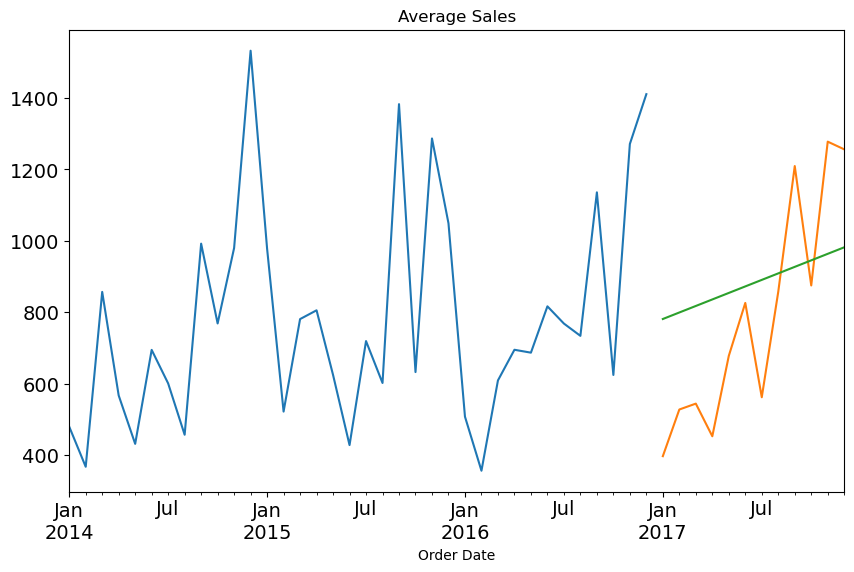

In [59]:
from statsmodels.tsa.api import Holt
Holt_df = test.copy()
#smoothing slope=beta
fit1 = Holt(train).fit(smoothing_level = 0.1,smoothing_trend = 0.35)
Holt_df['Holt_linear'] = fit1.forecast(steps=len(test))
 
train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_df['Holt_linear'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [60]:
fit1.aic

448.982533303775

In [61]:
Holt_df["Holt_linear"]

2017-01-31    781.464457
2017-02-28    799.707305
2017-03-31    817.950153
2017-04-30    836.193001
2017-05-31    854.435849
2017-06-30    872.678697
2017-07-31    890.921546
2017-08-31    909.164394
2017-09-30    927.407242
2017-10-31    945.650090
2017-11-30    963.892938
2017-12-31    982.135786
Freq: M, dtype: float64

In [64]:
#RMSE is used to compare different models with same data but different Algos
#choose the model with lowest RMSE value
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test,Holt_df["Holt_linear"]))
print(rmse)

265.2413902624746


In [65]:
"""
 
import numpy as np
my_dict={}
for i in np.arange(0.01,1,0.01):
    for j in np.arange(0.01,1,0.01):
        #from statsmodels.tsa.api import Holt
        Holt_df = test.copy()
        #soothing slope=beta
        fit1 = Holt(train).fit(smoothing_level = i,smoothing_slope = j)
        #Holt_df['Holt_linear'] = fit1.forecast(len(test))
        #print(fit1.aic,i,j)
        my_dict[i,j] = fit1.aic
 
"""

"\n \nimport numpy as np\nmy_dict={}\nfor i in np.arange(0.01,1,0.01):\n    for j in np.arange(0.01,1,0.01):\n        #from statsmodels.tsa.api import Holt\n        Holt_df = test.copy()\n        #soothing slope=beta\n        fit1 = Holt(train).fit(smoothing_level = i,smoothing_slope = j)\n        #Holt_df['Holt_linear'] = fit1.forecast(len(test))\n        #print(fit1.aic,i,j)\n        my_dict[i,j] = fit1.aic\n \n"

In [66]:
 

"""
for k in my_dict:
    if my_dict[k]==min(my_dict.values()):
        print(k,":",my_dict[k])
"""

'\nfor k in my_dict:\n    if my_dict[k]==min(my_dict.values()):\n        print(k,":",my_dict[k])\n'

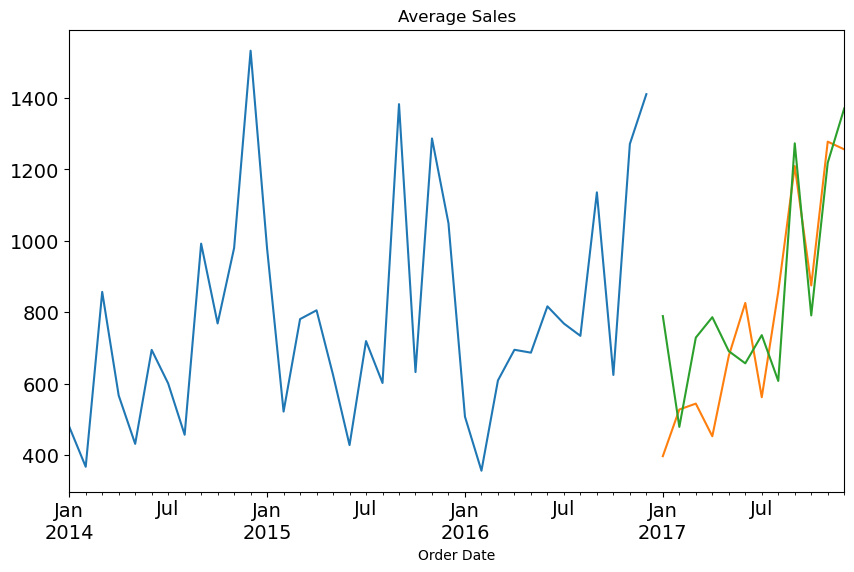

In [67]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()
#seasonalperiods=gamma
fit1 = ExponentialSmoothing(train ,seasonal_periods=12,
                            trend='add',
                            seasonal='add').fit()
Holt_Winter_df['Holt_Winter'] = fit1.forecast(steps=len(test))
 
train.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
test.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [70]:
fit1.aic

392.39062473148135

In [72]:
Holt_Winter_df["Holt_Winter"]

2017-01-31     789.680002
2017-02-28     479.584746
2017-03-31     729.439092
2017-04-30     786.559971
2017-05-31     691.434912
2017-06-30     657.425831
2017-07-31     736.375203
2017-08-31     608.142531
2017-09-30    1273.170681
2017-10-31     791.498413
2017-11-30    1218.795003
2017-12-31    1370.720625
Freq: M, dtype: float64

In [74]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test,Holt_Winter_df["Holt_Winter"]))
print(rmse)

193.7115308386924


In [ ]:
#out of all three models only Holt Winter Model works the best able to understand the trend

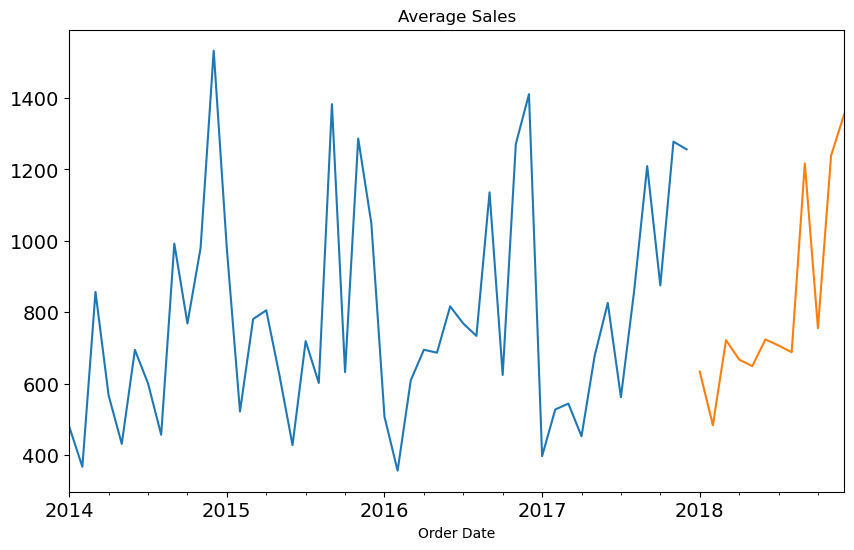

In [78]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy()
#seasonalperiods=gamma
fit1 = ExponentialSmoothing(y,seasonal_periods=12,
                            trend='add',
                            seasonal='add').fit()
Y_predictions = fit1.forecast(steps=12)
 
y.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
Y_predictions.plot(figsize=(10,6), title= 'Average Sales', fontsize=14)
plt.show()

In [79]:
Y_predictions

2018-01-31     634.610051
2018-02-28     484.385986
2018-03-31     722.211499
2018-04-30     668.084427
2018-05-31     649.422006
2018-06-30     724.302087
2018-07-31     707.463743
2018-08-31     688.555938
2018-09-30    1216.975767
2018-10-31     755.936340
2018-11-30    1239.032471
2018-12-31    1354.748692
Freq: M, dtype: float64

In [82]:
Y_predictions.to_excel('TimeSeriesOutput.xlsx',header=["Sales"],index=True)

In [83]:
!pip install pmdarima

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/ac/f8/6c9364602b13f0dba129b53acd1344859690911a4d5021560d9fd6aa087f/pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/20/50/638cbeb5b202b39d0605f6170fe25ed75287152827b0282d64135995b32b/Cython-3.0.9-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
   --- ------------------------------------ 61.4/614.7 kB 1.6 MB/s eta 0:00:01
   ------------------- -------------------- 307.2/614.7 kB 3.8 MB/s eta 0:00:01
   ------------------------------------- -- 583.7/614.7 kB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 3.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ----- ---------------------------------- 0.4/2.8 MB 11.6 MB/s eta 0:00:01
   --------- ---------

In [84]:
import pmdarima as pm

In [ ]:
"""
Box-Jenkins Method:
1.Identification- to identify the optimum values for the parameters PDQ-auto_arima()
2.Estimation-build the model using the optimum values
3.Validation-interpret how good is the model by validation testing
4.Forecasting- forecast for future time periods
"""

In [85]:
model = pm.auto_arima(y,start_p=0, max_p=3, d=None, max_d=2,start_q=0, max_q=3,  
                      start_P=0,max_P=3, D=None, max_D=2, start_Q=0, max_Q=3,
                      max_order=10, m=12, seasonal=True, information_criterion='aic',
                      test='adf',trace=True,random_state=10)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=524.319, Time=0.11 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=503.080, Time=0.23 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.21 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=502.081, Time=0.05 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=502.468, Time=0.17 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=inf, Time=0.52 sec
 ARIMA(2,2,0)(0,1,0)[12]             : AIC=499.444, Time=0.10 sec
 ARIMA(2,2,0)(1,1,0)[12]             : AIC=497.244, Time=0.41 sec
 ARIMA(2,2,0)(2,1,0)[12]             : AIC=495.283, Time=0.71 sec
 ARIMA(2,2,0)(3,1,0)[12]             : AIC=497.128, Time=2.82 sec
 ARIMA(2,2,0)(2,1,1)[12]             : AIC=inf, Time=1.12 sec
 ARIMA(2,2,0)(1,1,1)[12]             : AIC=inf, Time=0.54 sec
 ARIMA(2,2,0)(3,1,1)[12]             : AIC=inf, Time=3.72 sec
 ARIMA(1,2,0)(2,1,0)[12]             : AIC=503.589, Time=0.35 sec
 ARIMA(3,2,0)(2,1,0)[12]             : AIC=490.119, T

In [87]:
model.aic()

489.4176261246746

In [89]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train,
                order=(3,2,0),seasonal_order=(1,1,0,12)).fit()

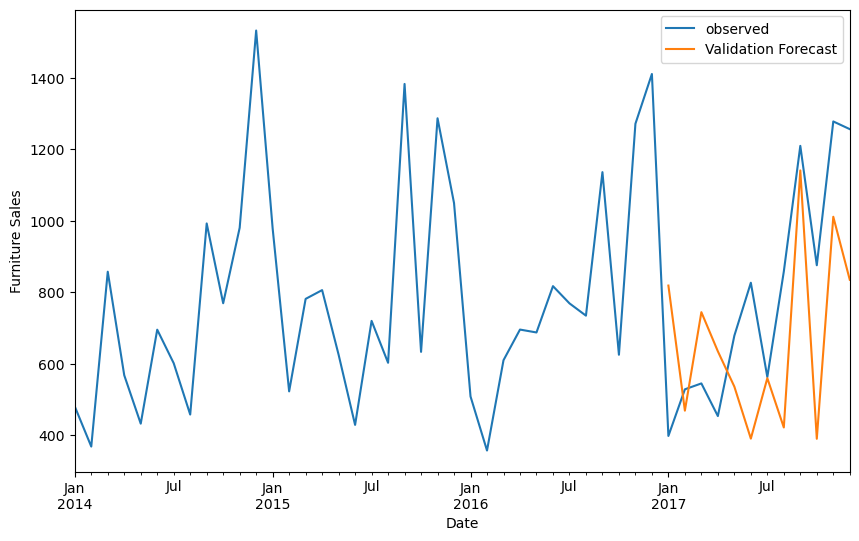

In [90]:
#pred = model.get_prediction(start=pd.to_datetime('2017-01-31')) 
pred = model.get_forecast(steps=12)
 
plt.figure(figsize=(10,6))
y.plot(label='observed')
pred.predicted_mean.plot(label='Validation Forecast')
plt.xlabel("Date")
plt.ylabel("Furniture Sales")
plt.legend()
plt.show()

In [91]:
pred.predicted_mean

2017-01-31     818.524058
2017-02-28     468.470303
2017-03-31     744.079613
2017-04-30     634.497925
2017-05-31     535.745764
2017-06-30     390.163744
2017-07-31     559.376227
2017-08-31     421.341558
2017-09-30    1140.775307
2017-10-31     389.701041
2017-11-30    1011.052460
2017-12-31     834.732300
Freq: M, Name: predicted_mean, dtype: float64

In [93]:
Y_pred= pred.predicted_mean
Y_test= y['2017-01-31':]
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print(rmse)

308.76975396633634


In [94]:
pred.predicted_mean.to_excel('TimeSeriesOutput_ARIMA.xlsx',header="Sales",index=True)

In [95]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(y,
                order=(3,2,0),seasonal_order=(1,1,0,12)).fit()

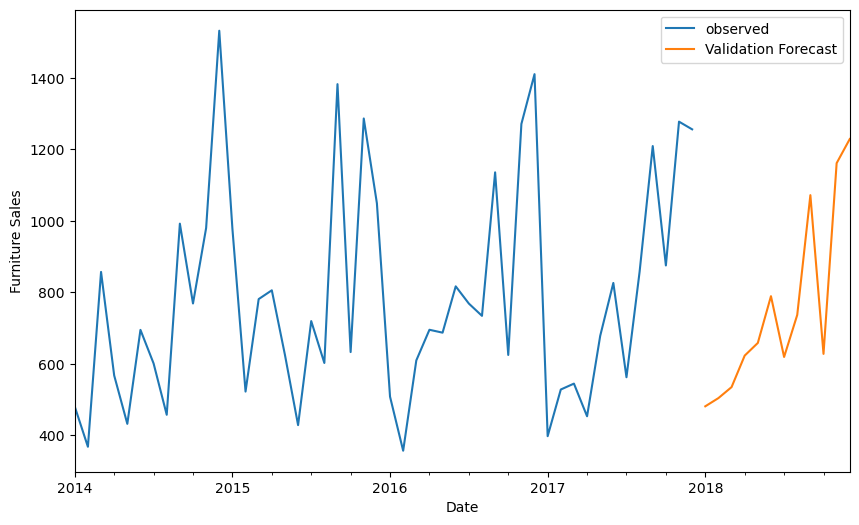

In [96]:
#pred = model.get_prediction(start=pd.to_datetime('2017-01-31')) 
pred = model.get_forecast(steps=12)
 
plt.figure(figsize=(10,6))
y.plot(label='observed')
pred.predicted_mean.plot(label='Validation Forecast')
plt.xlabel("Date")
plt.ylabel("Furniture Sales")
plt.legend()
plt.show()

In [97]:
pred.predicted_mean

2018-01-31     481.175782
2018-02-28     504.162671
2018-03-31     534.896811
2018-04-30     623.058252
2018-05-31     658.537447
2018-06-30     789.387677
2018-07-31     619.269519
2018-08-31     736.930522
2018-09-30    1072.136422
2018-10-31     627.864101
2018-11-30    1161.662892
2018-12-31    1229.291166
Freq: M, Name: predicted_mean, dtype: float64